In [2]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv('./data/HR.csv')

# T检验

In [37]:
dp_indices=df.groupby(by="department").indices

In [38]:
dp_indices

{'IT': array([   61,    62,    63, ..., 14932, 14933, 14938], dtype=int64),
 'RandD': array([  301,   302,   303,   304,   305,   453,   454,   455,   456,
          457,   605,   606,   607,   608,   609,   833,   834,   835,
          836,   837,   985,   986,   987,   988,   989,  1061,  1062,
         1063,  1064,  1065,  1217,  1218,  1219,  1291,  1292,  1293,
         1294,  1295,  1296,  1368,  1369,  1370,  1371,  1372,  1373,
         1445,  1446,  1447,  1448,  1449,  1450,  1522,  1523,  1524,
         1525,  1526,  1598,  1599,  1600,  1601,  1602,  1675,  1676,
         1677,  1678,  1679,  1751,  1752,  1753,  1754,  1755,  1827,
         1828,  1829,  1830,  1831,  1903,  1904,  1905,  1906,  1907,
         1979,  1980,  1981,  1982,  1983,  2055,  2056,  2057,  2058,
         2059,  2131,  2132,  2133,  2134,  2135,  2207,  2208,  2209,
         2210,  2211,  2283,  2284,  2285,  2286,  2287,  2359,  2360,
         2361,  2362,  2363,  2435,  2436,  2437,  2438,  2439,

In [39]:
sales_values=df["left"].iloc[dp_indices["sales"]].values

In [40]:
technical_values=df["left"].iloc[dp_indices["technical"]].values

In [41]:
# T检验统计量
ss.ttest_ind(sales_values,technical_values)

Ttest_indResult(statistic=-1.0601649378624074, pvalue=0.2891069046174478)

In [46]:
dp_keys=list(dp_indices.keys())

In [47]:
dp_t_mat=np.zeros((len(dp_keys),len(dp_keys)))

In [55]:
for i in range(len(dp_keys)):
    for j in range(len(dp_keys)):
        p_value=ss.ttest_ind(df["left"].iloc[dp_indices[dp_keys[i]]].values,df["left"].iloc[dp_indices[dp_keys[j]]].values)[1]
        if p_value<0.05:
            dp_t_mat[i][j]=-1
        else:
            dp_t_mat[i][j]=p_value

C:\Z_TOOL\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Z_TOOL\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Z_TOOL\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


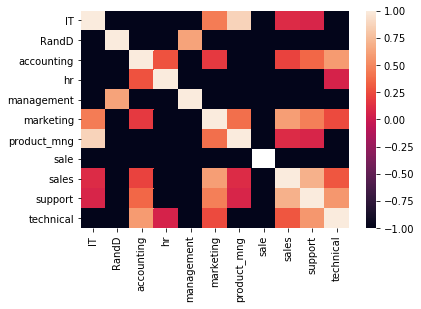

In [56]:
sns.heatmap(dp_t_mat,xticklabels=dp_keys,yticklabels=dp_keys)

# 透视表

In [50]:
piv_tb=pd.pivot_table(df, values="left", index=["department", "salary"], columns=["time_spend_company"],aggfunc=np.mean)

In [51]:
piv_tb

time_spend_company        2         3         4         5         6    7   \
department  salary                                                          
IT          high    0.000000  0.054054  0.000000  0.333333  0.000000  NaN   
            low     0.000000  0.284091  0.394737  0.625000  0.259259  0.0   
            medium  0.033058  0.171171  0.352273  0.452830  0.000000  0.0   
RandD       high    0.000000  0.120000  0.125000  0.000000  0.000000  NaN   
            low     0.012048  0.140127  0.163934  0.475000  0.176471  NaN   
            medium  0.011364  0.125786  0.301587  0.526316  0.083333  NaN   
accounting  high    0.000000  0.114286  0.100000  0.000000  0.000000  NaN   
            low     0.000000  0.277108  0.386364  0.485714  0.200000  NaN   
            medium  0.046154  0.313433  0.419355  0.589744  0.315789  NaN   
hr          high    0.000000  0.200000  0.272727       NaN  0.000000  NaN   
            low     0.000000  0.290909  0.411765  0.486486  0.454545  NaN   
            medium  0.000000  0.418301  0.450000  0.473684  0.275862  NaN   
management  high    0.000000  0.000000  0.055556  0.000000  0.000000  0.0   
            low     0.000000  0.390244  0.437500  0.687500  0.285714  NaN   
            medium  0.027027  0.096386  0.414634  0.250000  0.000000  0.0   
marketing   high    0.000000  0.230769  0.000000  0.000000  0.000000  NaN   
            low     0.000000  0.328042  0.451613  0.636364  0.576923  0.0   
            medium  0.000000  0.227273  0.147059  0.588235  0.150000  0.0   
product_mng high    0.000000  0.133333  0.222222  0.000000  0.000000  0.0   
            low     0.000000  0.219780  0.333333  0.545455  0.666667  0.0   
            medium  0.000000  0.252874  0.215385  0.647059  0.368421  0.0   
sale        low          NaN  1.000000       NaN       NaN       NaN  NaN   
            nme     1.000000       NaN       NaN       NaN       NaN  NaN   
sales       high    0.000000  0.029126  0.097561  0.500000  0.000000  0.0   
            low     0.033259  0.365962  0.417143  0.677165  0.402299  0.0   
            medium  0.023873  0.190601  0.269091  0.451852  0.164557  0.0   
support     high    0.000000  0.067797  0.050000  0.272727  0.000000  NaN   
            low     0.022523  0.353282  0.466667  0.600000  0.568966  NaN   
            medium  0.024000  0.140704  0.208054  0.568182  0.333333  NaN   
technical   high    0.000000  0.137255  0.093750  0.444444  0.000000  NaN   
            low     0.003333  0.256849  0.466912  0.606299  0.306667  NaN   
            medium  0.028226  0.212632  0.394366  0.635659  0.303030  0.0   

time_spend_company   8    10  
department  salary            
IT          high    NaN  NaN  
            low     0.0  0.0  
            medium  0.0  0.0  
RandD       high    0.0  NaN  
            low     0.0  NaN  
            medium  NaN  NaN  
accounting  high    0.0  NaN  
            low     0.0  0.0  
            medium  0.0  0.0  
hr          high    NaN  NaN  
            low     NaN  NaN  
            medium  0.0  NaN  
management  high    0.0  0.0  
            low     NaN  0.0  
            medium  0.0  0.0  
marketing   high    0.0  0.0  
            low     0.0  0.0  
            medium  0.0  0.0  
product_mng high    NaN  0.0  
            low     0.0  0.0  
            medium  0.0  0.0  
sale        low     NaN  NaN  
            nme     NaN  NaN  
sales       high    NaN  0.0  
            low     0.0  0.0  
            medium  0.0  0.0  
support     high    NaN  0.0  
            low     0.0  0.0  
            medium  0.0  0.0  
technical   high    NaN  0.0  
            low     0.0  0.0  
            medium  0.0  0.0

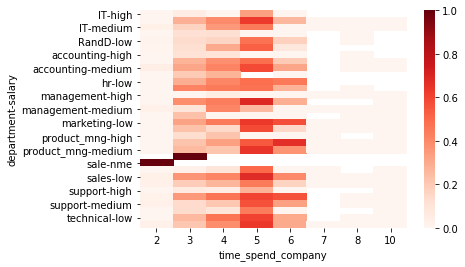

In [54]:
sns.heatmap(piv_tb, vmin=0, vmax=1, cmap=sns.color_palette('Reds',n_colors=256))